In [15]:
import os
from pathlib import Path
from ultralytics import YOLO
import cv2

In [ ]:
model_path = 'runs/detect/train19 nb2/weights/best.pt'
input_dir = 'Test Final/images'
output_txt_dir = 'Final Pred/t19c24'
conf_threshold = 0.21

In [17]:
os.makedirs(output_txt_dir, exist_ok=True)

model = YOLO(model_path)

image_extensions = ['.jpg', '.jpeg', '.png']
image_files = [f for f in Path(input_dir).glob("*") if f.suffix.lower() in image_extensions]

In [18]:
for img_path in image_files:
    results = model(img_path, conf=conf_threshold)[0]

    h, w = cv2.imread(str(img_path)).shape[:2]
    label_lines = []

    for box in results.boxes:
        cls_id = int(box.cls)
        conf = float(box.conf)
        x1, y1, x2, y2 = box.xyxy[0]

        x_center = ((x1 + x2) / 2) / w
        y_center = ((y1 + y2) / 2) / h
        bbox_width = (x2 - x1) / w
        bbox_height = (y2 - y1) / h

        label_lines.append(f"{cls_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}")

    txt_filename = Path(output_txt_dir) / (img_path.stem + ".txt")
    with open(txt_filename, "w") as f:
        f.write("\n".join(label_lines))


image 1/1 e:\SOI_SC\Test Final\images\Lunar_A-0-0_jpg.rf.e8e930ba7f8422e6c7aa2210877a40bf.jpg: 640x640 112 craters, 167.5ms
Speed: 3.4ms preprocess, 167.5ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 e:\SOI_SC\Test Final\images\Lunar_A-0-1_jpg.rf.92d1839148922f65a80a7415e9787d4b.jpg: 640x640 100 craters, 142.2ms
Speed: 2.8ms preprocess, 142.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 e:\SOI_SC\Test Final\images\Lunar_A-0-21_jpg.rf.b254a8bfdf45fe72fbb503a4a5b851e0.jpg: 640x640 82 craters, 124.9ms
Speed: 2.6ms preprocess, 124.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 e:\SOI_SC\Test Final\images\Lunar_A-0-28_jpg.rf.dc74cbf98eeb98e3ef32f10cf20fb0aa.jpg: 640x640 7 craters, 130.1ms
Speed: 2.4ms preprocess, 130.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 e:\SOI_SC\Test Final\images\Lunar_A-0-39_jpg.rf.650db3f22ecacc2ccbad70ef21d18831.jpg: 640x640 42 c

In [19]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(
    data='Test Final/images',
    det_model='runs/detect/train19 nb2/weights/best.pt',
    output_dir='Final Pred/t19c24_AA',
)

100%|██████████| 358M/358M [01:36<00:00, 3.89MB/s] 



image 1/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-0_jpg.rf.e8e930ba7f8422e6c7aa2210877a40bf.jpg: 640x640 98 craters, 193.3ms
image 2/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-1_jpg.rf.92d1839148922f65a80a7415e9787d4b.jpg: 640x640 89 craters, 96.3ms
image 3/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-21_jpg.rf.b254a8bfdf45fe72fbb503a4a5b851e0.jpg: 640x640 66 craters, 88.7ms
image 4/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-28_jpg.rf.dc74cbf98eeb98e3ef32f10cf20fb0aa.jpg: 640x640 5 craters, 209.3ms
image 5/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-39_jpg.rf.650db3f22ecacc2ccbad70ef21d18831.jpg: 640x640 38 craters, 133.0ms
image 6/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-49_jpg.rf.c0a67db25cf8fda1e85cf5829f5fd134.jpg: 640x640 38 craters, 119.6ms
image 7/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-54_jpg.rf.f632644036777367fae0489413f55e41.jpg: 640x640 29 craters, 178.5ms
image 8/1304 e:\SOI_SC\Test Final\images\Lunar_A-0-55_jpg.rf.885359407df5acab7fe074f91da2bf2a.jpg: 640x640 28 crate

KeyboardInterrupt: 

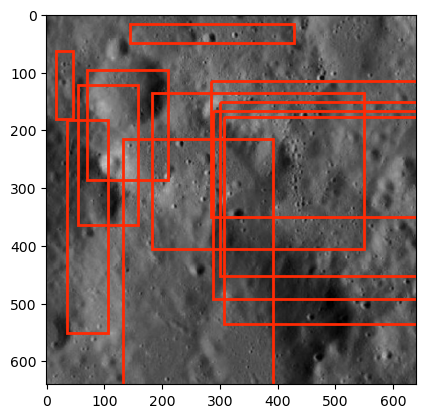

In [22]:
from ultralytics.data.utils import visualize_image_annotations

label_map = {  # Define the label map with all annotated class labels.
    0: ''
}

# Visualize
visualize_image_annotations(
    'Test Final/images/Lunar_A-0-0_jpg.rf.e8e930ba7f8422e6c7aa2210877a40bf.jpg',  # Input image path.
    'Final Pred/t19c24_AA/Lunar_A-0-0_jpg.rf.e8e930ba7f8422e6c7aa2210877a40bf.txt',  # Annotation file path for the image.
    label_map,
)